In [10]:
import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym

from rlforge.experiments import runEpisodicExperiment
from rlforge.agents import LinearQAgent
from rlforge.environments import ObstacleAvoidance

In [11]:
env = ObstacleAvoidance(initial_state=(-1.5,1.5,0),
                        x_range=(-2,2),
                        y_range=(-2,2),
                        target=(1.5,-1.5,0.05),
                        obstacles=[(-0.5,-1,0.3),(0,0,0.2),(0,1,0.3),(1,-1,0.2)],
                        dt=0.1)
agent = LinearQAgent(step_size=0.5/8,
                     discount=1,
                     num_actions=env.num_actions,
                     dims_ranges=((env.x_range[0],env.x_range[1]),(env.y_range[0],env.y_range[1]),(-np.pi,np.pi),(0,np.sqrt(32)),(-np.pi,np.pi)),
                     epsilon=0.1,
                     iht_size=4096,
                     num_tilings=8,
                     num_tiles=8,
                     wrap_dims=(False,False,True,False,True))

In [12]:
rewards, steps_per_episode = runEpisodicExperiment(env, agent, 10, 800, 1000)

Run 0/10 - Episodes:   4%|▍         | 31/800 [00:00<00:15, 49.10it/s]

IHT full, starting to allow collisions


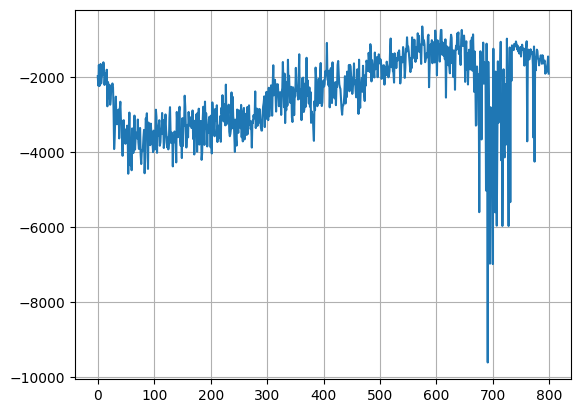

In [13]:
plt.plot(np.mean(rewards, axis=1))
plt.grid()

In [14]:
max_steps = 2000
rewards_test = []
steps = 0
states = []
actions = []

new_state = env.reset()[0]
states.append(new_state)
steps = 0
is_terminal = False
total_reward = 0

action = agent.start(new_state)
actions.append(action)

while not is_terminal:

    new_state, reward, terminated, _, _ = env.step(action)
    states.append(new_state)

    is_terminal = terminated
    if steps == max_steps - 1:
        is_terminal = True

    if is_terminal:
        action = agent.end(reward)
    else:
        action = agent.step(reward, new_state)

    actions.append(action)

    rewards_test.append(reward)
    steps += 1

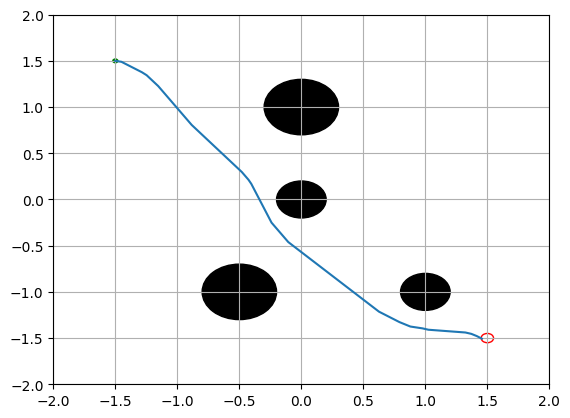

In [15]:
figure, axes = plt.subplots()
axes.set_ylim(env.y_range[0],env.y_range[1])
axes.set_xlim(env.x_range[0],env.x_range[1])

target = plt.Circle((env.target[0],env.target[1]), env.target[2], fill=False, color='r')
start = plt.Circle((env.initial_state[0],env.initial_state[1]), 0.02, color='g')
for o in env.obstacles:
    axes.add_artist(plt.Circle((o[0],o[1]), o[2], color='black'))

axes.add_artist(target)
axes.add_artist(start)
axes.plot(np.array(states)[:,0], np.array(states)[:,1])
plt.grid()

# plt.plot(np.array(states)[:,0], np.array(states)[:,1])
# plt.grid()

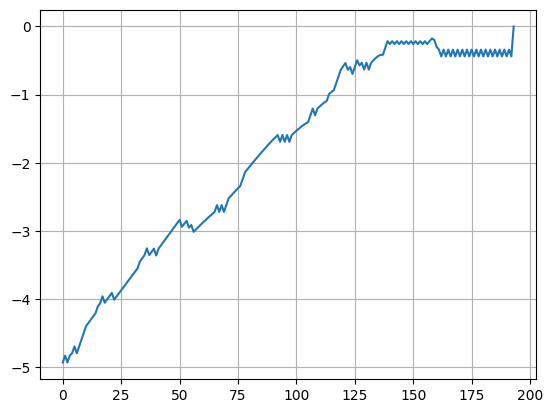

In [16]:
plt.plot(rewards_test)
plt.grid()